# Preprocesamiento de los datos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import importlib

In [13]:
import basic_preprocessing as bp
import auxiliares_data as aux_d
import crear_dataset as cd

## Parte 1: Limpieza de datos
### Usuarios
Cambios para limpiar los datos de usuarios:
- eliminar la última columna que no esta en 2024
- pasar al mismo formato (sacar comillas donde corresponde)
- eliminar primera fila con los nombres de las features
- cortar hasta agosto 2024

In [3]:
# Definimos los paths para los archivos de usuarios de cada año usando os.path.join
BASE_DIR = os.getcwd()

usuarios_2023_path = os.path.join(BASE_DIR, '..', 'data', 'raw', 'usuarios', 'usuarios_ecobici_2023.csv')
usuarios_2022_path = os.path.join(BASE_DIR, '..', 'data', 'raw', 'usuarios', 'usuarios_ecobici_2022.csv')
usuarios_2021_path = os.path.join(BASE_DIR, '..', 'data', 'raw', 'usuarios', 'usuarios_ecobici_2021.csv')
usuarios_2020_path = os.path.join(BASE_DIR, '..', 'data', 'raw', 'usuarios', 'usuarios_ecobici_2020.csv')
usuarios_2024_path = os.path.join(BASE_DIR, '..', 'data', 'raw', 'usuarios', 'usuarios_ecobici_2024.csv')

In [5]:
importlib.reload(bp)
df_users, users_cut = bp.unite_usuarios(
    usuarios_2024_path,
    usuarios_2023_path,
    usuarios_2022_path,
    usuarios_2021_path,
    usuarios_2020_path
)

# guardamos df_users en un archivo csv
df_users.to_csv(os.path.join(BASE_DIR, '..', 'data', 'clean', 'usuarios_ecobici.csv'), index=False)

c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\basic_preprocessing.py:5: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


### Recorridos

Cambios para limpiar los datos del recorrido:



In [6]:
#Definimos los paths para los archivos de recorridos de cada año usando os.path.join
recorridos_2024_path = os.path.join(BASE_DIR, '..', 'data', 'raw', 'recorridos', 'trips_2024.csv')
recorridos_2023_path = os.path.join(BASE_DIR, '..', 'data', 'raw', 'recorridos', 'trips_2023.csv')
recorridos_2022_path = os.path.join(BASE_DIR, '..', 'data', 'raw', 'recorridos', 'trips_2022.csv')
recorridos_2021_path = os.path.join(BASE_DIR, '..', 'data', 'raw', 'recorridos', 'trips_2021.csv')
recorridos_2020_path = os.path.join(BASE_DIR, '..', 'data', 'raw', 'recorridos', 'trips_2020.csv')

In [59]:
importlib.reload(bp)
df_recs, eliminados_rec = bp.limpiar_recorridos(
    recorridos_2024_path,
    recorridos_2023_path,
    recorridos_2022_path,
    recorridos_2021_path,
    None #recorridos_2020_path
)

# guardamos df_recs en un archivo csv
df_recs.to_csv(os.path.join(BASE_DIR, '..', 'data', 'clean', 'recorridos_ecobici.csv'), index=False)

c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\basic_preprocessing.py:143: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2023 = pd.read_csv(csv_2023, **read_csv_params)


Rango de fechas original:
2024-01-01 00:06:50 a 2024-12-31 23:58:25
Fecha límite aplicada: 2024-08-31 23:59:59
Rango de fechas después de cortar:
2024-01-01 00:06:50 a 2024-08-31 23:54:32
Filas eliminadas: 1403639


In [60]:
#Unificamos los datasets de usuarios y recorridos
importlib.reload(bp)
print(df_users.head())

df_unificado = bp.unificar_datasets(df_recs, df_users)

# guardamos df_unificado en un archivo csv
df_unificado.to_csv(os.path.join(BASE_DIR, '..', 'data', 'clean', 'usuarios_recorridos_ecobici.csv'), index=False)

  id_usuario genero_usuario edad_usuario fecha_alta hora_alta
0     629007         FEMALE         25.0 2020-01-01  18:08:32
1     628464         FEMALE         57.0 2020-01-01  10:11:03
2     628448           MALE         64.0 2020-01-01  09:49:05
3     628373           MALE         22.0 2020-01-01  01:31:03
4     628976           MALE         33.0 2020-01-01  17:47:35


Estadísticas del merge:
Total recorridos: 10560871
Recorridos con información de usuario: 6068228
Recorridos sin información de usuario: 4492643
Porcentaje de match: 57.46%


In [61]:
importlib.reload(aux_d)
aux_d.get_muestras(df_unificado)

,Id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta,género,edad_usuario,fecha_alta,hora_alta
0,18999377,565,2023-09-05 14:59:57,262,349 - Plaza Saenz Peña,Andrés Lamas 1699,-58.467297,-34.609709,2023-09-05 15:09:22,342,218 - Campana,1523 Campana,-58.484297,-34.616813,182948,FIT,FEMALE,NaN,NaT,NaN
1,11378975,632,2021-06-26 06:00:57,91,091 - Pasco,708 Pasco & Chile,-58.397602,-34.617448,2021-06-26 06:11:29,24,024 - ALSINA,Adolfo Alsina& Bernardo De Irigoyen,-34.610583,"-34.610583,-58.3808943",640310,ICONIC,FEMALE,23.0,2020-01-15,17:43:41
2,14244217,359,2022-04-21 19:56:04,73,073 - Ruy Díaz de Guzmán,Avenida Martin Garcia y Ruy Díaz de Guzmán,-58.371823,-34.630681,2022-04-21 20:02:03,433,273 - Plazoleta Colombia,1619 Brandsen,-58.373726,-34.637697,404564,ICONIC,OTHER,NaN,NaT,NaN
3,17267286,797,2023-02-17 04:04:51,187,261 - QUINTEROS LIDORO,"1483 Quinteros, Lidoro J. Av.",-58.450897,-34.552571,2023-02-17 04:18:08,187,261 - QUINTEROS LIDORO,"1483 Quinteros, Lidoro J. Av.",-58.450897,-34.552571,918518,ICONIC,MALE,40,2022-11-05,17:08:56
4,17793583,"1,366",2023-04-11 20:20:31,65,065 - Julián Álvarez,3822 Guemes,-58.415787,-34.587312,2023-04-11 20:43:17,25,025 - Plaza Guemes,"Salguero, Jeronimo & Mansilla, Lucio Norberto,...",-58.416118,-34.589427,976759,FIT,FEMALE,19,2023-04-11,19:49:46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,19019056,"1,216",2023-09-07 19:11:30,44,044 - Ecoparque,"Av. Del Libertador, 3260",-58.413883,-34.575515,2023-09-07 19:31:46,193,193 - ARENALES Y AGUERO,Arenales y Aguero,-58.406165,-34.590863,879115,FIT,MALE,23,2022-08-07,14:53:42
996,14233028,914,2022-04-21 07:18:55,50,050 - Hospital Rivadavia,2516 Pereyra Lucena,-58.401080,-34.583735,2022-04-21 07:34:09,210,335 - General Urquiza,Figueroa Alcorta & Sarmiento,-58.411278,-34.572165,670145,ICONIC,MALE,66.0,2020-06-24,16:08:37
997,13310065,"1,100",2022-01-21 16:21:35,54,054 - Acuña de Figueroa,Lavalle 4015,-58.422069,-34.598210,2022-01-21 16:39:55,199,199 - ESTADOS UNIDOS Y BOEDO,3568 Estados Unidos & Boedo Av.,-58.416014,-34.62226,97988,FIT,MALE,NaN,NaT,NaN
998,12525040,842,2021-11-03 09:43:47,364,381 - Matienzo Y Arce,"1798 Matienzo, Benjamin, Teniente",-58.434470,-34.568693,2021-11-03 09:57:49,206,159 - Fitz Roy & Gorriti,Fitz Roy & Gorriti,-34.58495,"-34.58495,-58.437339",671998,ICONIC,MALE,29.0,2020-07-17,18:03:08


{2: 33391, 3: 47655, 4: 43729, 5: 102730, 6: 41035, 7: 17150, 8: 102291, 9: 90876, 12: 48765, 13: 32637, 14: 127526, 17: 65406, 20: 23897, 21: 26031, 22: 31567, 23: 34502, 24: 18015, 25: 73525, 26: 41089, 27: 40458, 28: 1, 29: 85846, 30: 50127, 31: 6945, 32: 37696, 33: 61271, 35: 31073, 36: 20086, 38: 44772, 41: 33497, 42: 2502, 43: 19287, 44: 53224, 45: 30906, 46: 34998, 48: 21608, 49: 21488, 50: 48979, 51: 16534, 54: 88148, 56: 54701, 57: 9305, 58: 29553, 59: 29231, 60: 23130, 61: 11425, 63: 34410, 64: 44914, 65: 59297, 66: 79114, 68: 16361, 69: 71263, 70: 59621, 71: 41327, 73: 36157, 74: 60960, 75: 55193, 76: 41769, 77: 10562, 79: 55471, 80: 34034, 82: 60761, 83: 60159, 84: 13557, 85: 58275, 86: 34592, 87: 32660, 89: 50201, 91: 40585, 92: 20596, 93: 42522, 94: 30237, 95: 27240, 96: 86644, 98: 25066, 99: 53341, 101: 32912, 102: 14543, 104: 34917, 105: 178, 107: 23534, 111: 62427, 112: 29649, 114: 19121, 116: 53195, 117: 52072, 118: 30320, 120: 29864, 121: 75383, 122: 19654, 124: 4649

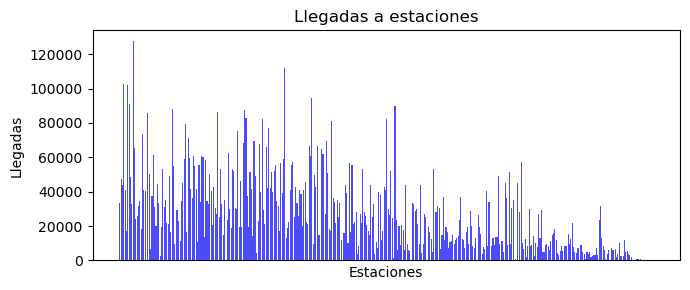

In [74]:
importlib.reload(aux_d)
count = aux_d.count_samples(df_unificado)
print(count)

# histograma de llegada a estaciones
stations = list(count.keys())
print(len(stations))
arrivals = list(count.values())
aux_d.plot_histogram(stations, arrivals, 'Llegadas a estaciones', 'Estaciones', 'Llegadas')


Separamos en train val y test donde test y val son las últimas muestras.
- train - 80% de los datos
- val - 10% de los datos
- test - 10% de los datos

In [77]:
importlib.reload(aux_d)
train_clean, val_clean, test_clean = aux_d.split_dataframe(df_unificado)
print("Train: ", train_clean.head())
print("Validation: ", val_clean.head())
print("Test: ", test_clean.head())

Total muestras: 10560871
Train: 8448696 (80.0%)
Val: 1056087 (10.0%)
Test: 1056088 (10.0%)
Train:    Id_recorrido duracion_recorrido fecha_origen_recorrido  id_estacion_origen  \
0      9646397                249    2021-01-01 00:11:45                 236   
1      9646402                262    2021-01-01 00:16:04                  86   
2      9646396                690    2021-01-01 00:09:43                 277   
3      9646398                659    2021-01-01 00:12:44                 186   
4      9646409                 77    2021-01-01 00:22:42                 261   

         nombre_estacion_origen         direccion_estacion_origen  \
0  254 - Plaza Rafael Hernandez           Vuelta de Obligado 2004   
1                086 - SAAVEDRA                     1019 Saavedra   
2           292 - PLAZA BOLIVIA  Olleros Av. & Del Libertador Av.   
3              186 - MANZANA 66                       2875 Moreno   
4    272 - Plaza Bruno Giordano            Bruno Giordano&Neuquen   

   lo

# Crear dataset
generamos un dataset donde cada muestra es la cantidad de bicis llegadas a una estación específica en una hora específica.

In [ ]:
importlib.reload(cd)
dataset_train_14 = cd.crear_dataset_prediccion_bicis(train_clean, 14)
dataset_val_14 = cd.crear_dataset_prediccion_bicis(val_clean, 14)
dataset_test_14 = cd.crear_dataset_prediccion_bicis(test_clean, 14)

# # Preparar para ML (SIN hora)
# X, y, feature_names, dataset_ml = cd.preparar_para_ml(dataset, incluir_tiempo=True)


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

In [79]:
dataset_train_14.to_csv(os.path.join(BASE_DIR, '..', 'data', 'processed', 'dataset_14_train.csv'), index=False)
dataset_val_14.to_csv(os.path.join(BASE_DIR, '..', 'data', 'processed', 'dataset_14_val.csv'), index=False)
dataset_test_14.to_csv(os.path.join(BASE_DIR, '..', 'data', 'processed', 'dataset_14_test.csv'), index=False)


In [ ]:
print(count)
aux_d.get_muestras(dataset_train_14)

{2: 33391, 3: 47655, 4: 43729, 5: 102730, 6: 41035, 7: 17150, 8: 102291, 9: 90876, 12: 48765, 13: 32637, 14: 127526, 17: 65406, 20: 23897, 21: 26031, 22: 31567, 23: 34502, 24: 18015, 25: 73525, 26: 41089, 27: 40458, 28: 1, 29: 85846, 30: 50127, 31: 6945, 32: 37696, 33: 61271, 35: 31073, 36: 20086, 38: 44772, 41: 33497, 42: 2502, 43: 19287, 44: 53224, 45: 30906, 46: 34998, 48: 21608, 49: 21488, 50: 48979, 51: 16534, 54: 88148, 56: 54701, 57: 9305, 58: 29553, 59: 29231, 60: 23130, 61: 11425, 63: 34410, 64: 44914, 65: 59297, 66: 79114, 68: 16361, 69: 71263, 70: 59621, 71: 41327, 73: 36157, 74: 60960, 75: 55193, 76: 41769, 77: 10562, 79: 55471, 80: 34034, 82: 60761, 83: 60159, 84: 13557, 85: 58275, 86: 34592, 87: 32660, 89: 50201, 91: 40585, 92: 20596, 93: 42522, 94: 30237, 95: 27240, 96: 86644, 98: 25066, 99: 53341, 101: 32912, 102: 14543, 104: 34917, 105: 178, 107: 23534, 111: 62427, 112: 29649, 114: 19121, 116: 53195, 117: 52072, 118: 30320, 120: 29864, 121: 75383, 122: 19654, 124: 4649

,fecha_hora,fecha,hora,id_estacion,dia_semana,mes,año,es_feriado,bicis_llegaron_h1,bicis_llegaron_h2,bicis_llegaron_h3,bicis_llegaron_h4,bicis_llegaron_h5,bicis_llegaron_h6,total_bicis_salieron,pct_mujeres_salieron,pct_hombres_salieron,promedio_edad_salieron,pct_iconic_salieron,target
0,2023-02-12 03:00:00,2023-02-12,3,14,6,2,2023,0,1.0,0.0,3.0,4.0,5.0,2.0,0.0,0.0,0.0,31.971876,0.000000,2.0
1,2022-07-19 16:00:00,2022-07-19,16,14,1,7,2022,0,7.0,10.0,0.0,8.0,3.0,6.0,14.0,0.0,1.0,34.166667,0.214286,16.0
2,2023-07-02 05:00:00,2023-07-02,5,14,6,7,2023,0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,31.971876,0.000000,0.0
3,2023-07-07 18:00:00,2023-07-07,18,14,4,7,2023,0,16.0,11.0,9.0,4.0,15.0,8.0,14.0,0.0,1.0,30.833333,0.428571,14.0
4,2023-10-31 19:00:00,2023-10-31,19,14,1,10,2023,0,2.0,2.0,8.0,3.0,0.0,2.0,5.0,0.0,1.0,30.250000,0.400000,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2022-02-23 20:00:00,2022-02-23,20,14,2,2,2022,0,10.0,15.0,7.0,4.0,7.0,5.0,11.0,0.0,1.0,33.600000,0.454545,10.0
996,2021-02-07 08:00:00,2021-02-07,8,14,6,2,2021,0,2.0,3.0,3.0,0.0,2.0,6.0,2.0,0.0,1.0,0.000000,1.000000,3.0
997,2021-09-01 11:00:00,2021-09-01,11,14,2,9,2021,0,8.0,2.0,5.0,4.0,2.0,0.0,3.0,0.0,1.0,30.000000,0.666667,5.0
998,2021-06-11 12:00:00,2021-06-11,12,14,4,6,2021,0,4.0,3.0,9.0,2.0,2.0,3.0,7.0,0.0,1.0,38.750000,1.000000,4.0


Creamos dataset para todas las estaciones con lsa features inciales simples.

In [81]:
lista_estaciones = list(count.keys())
print(lista_estaciones)

importlib.reload(cd)
datasets_train = cd.generar_dataset_multiple_estaciones(train_clean, lista_estaciones)

[2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 14, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 38, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 54, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 68, 69, 70, 71, 73, 74, 75, 76, 77, 79, 80, 82, 83, 84, 85, 86, 87, 89, 91, 92, 93, 94, 95, 96, 98, 99, 101, 102, 104, 105, 107, 111, 112, 114, 116, 117, 118, 120, 121, 122, 124, 126, 128, 130, 131, 132, 134, 135, 137, 138, 144, 146, 148, 149, 150, 151, 152, 153, 155, 156, 158, 161, 162, 163, 164, 165, 166, 167, 168, 169, 171, 172, 174, 175, 176, 177, 179, 181, 182, 183, 184, 186, 187, 188, 189, 190, 191, 193, 194, 196, 197, 199, 200, 202, 203, 204, 205, 206, 207, 208, 210, 212, 213, 214, 215, 216, 219, 220, 222, 223, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 239, 241, 242, 245, 247, 248, 249, 251, 252, 253, 254, 255, 257, 258, 259, 260, 261, 262, 263, 264, 265, 267, 268, 269, 270, 271, 273, 275, 277, 278, 280, 281, 284, 288, 289, 291, 294, 299, 301, 302, 304, 307, 308, 309, 310, 311

c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 3...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 4...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 5...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 6...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 7...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 8...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 9...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 12...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 13...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 14...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 17...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 20...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 21...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 22...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 23...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 24...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 25...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 26...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 27...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 28...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 29...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 30...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 31...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 32...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 33...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 35...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 36...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 38...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 41...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 42...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 43...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 44...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 45...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 46...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 48...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 49...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 50...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 51...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 54...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 56...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 57...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 58...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 59...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 60...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 61...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 63...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 64...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 65...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 66...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 68...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 69...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 70...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 71...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 73...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 74...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 75...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 76...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 77...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 79...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 80...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 82...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 83...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 84...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 85...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 86...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 87...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 89...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 91...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 92...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 93...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 94...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 95...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 96...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 98...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 99...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 101...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 102...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 104...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 105...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 107...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 111...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 112...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 114...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 116...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 117...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 118...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 120...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 121...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 122...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 124...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 126...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 128...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 130...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 131...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 132...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 134...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 135...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 137...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 138...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 144...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 146...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 148...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 149...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 150...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 151...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 152...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 153...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 155...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 156...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 158...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 161...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 162...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 163...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 164...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 165...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 166...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 167...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 168...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 169...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 171...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 172...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 174...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 175...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 176...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 177...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 179...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 181...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 182...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 183...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 184...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 186...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 187...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 188...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 189...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 190...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 191...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 193...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 194...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 196...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 197...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 199...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 200...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 202...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 203...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 204...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 205...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_min = df['fecha_origen_recorrido'].min().floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_max = df['fecha_destino_

Procesando estación 206...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')


Error procesando estación 206: Unable to allocate 64.5 MiB for an array with shape (8448696,) and data type datetime64[ns]
Procesando estación 207...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')


Error procesando estación 207: Unable to allocate 64.5 MiB for an array with shape (8448696,) and data type datetime64[ns]
Procesando estación 208...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')


Error procesando estación 208: Unable to allocate 64.5 MiB for an array with shape (8448696,) and data type datetime64[ns]
Procesando estación 210...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')


Error procesando estación 210: Unable to allocate 64.5 MiB for an array with shape (8448696,) and data type datetime64[ns]
Procesando estación 212...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')


Error procesando estación 212: Unable to allocate 64.5 MiB for an array with shape (8448696,) and data type datetime64[ns]
Procesando estación 213...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')


Error procesando estación 213: Unable to allocate 64.5 MiB for an array with shape (8448696,) and data type datetime64[ns]
Procesando estación 214...
Error procesando estación 214: Unable to allocate 64.5 MiB for an array with shape (8448696,) and data type datetime64[ns]
Procesando estación 215...
Error procesando estación 215: Unable to allocate 64.5 MiB for an array with shape (8448696,) and data type datetime64[ns]
Procesando estación 216...
Error procesando estación 216: Unable to allocate 64.5 MiB for an array with shape (8448696,) and data type datetime64[ns]
Procesando estación 219...
Error procesando estación 219: Unable to allocate 64.5 MiB for an array with shape (8448696,) and data type datetime64[ns]
Procesando estación 220...
Error procesando estación 220: Unable to allocate 64.5 MiB for an array with shape (8448696,) and data type datetime64[ns]
Procesando estación 222...
Error procesando estación 222: Unable to allocate 64.5 MiB for an array with shape (8448696,) and da

c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')


Error procesando estación 369: Unable to allocate 64.5 MiB for an array with shape (8448696,) and data type datetime64[ns]
Procesando estación 370...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')


Error procesando estación 370: Unable to allocate 64.5 MiB for an array with shape (8448696,) and data type datetime64[ns]
Procesando estación 371...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')


Error procesando estación 371: Unable to allocate 64.5 MiB for an array with shape (8448696,) and data type datetime64[ns]
Procesando estación 372...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')


Error procesando estación 372: Unable to allocate 8.06 MiB for an array with shape (8448696,) and data type bool
Procesando estación 373...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')


Error procesando estación 373: Unable to allocate 64.5 MiB for an array with shape (8448696,) and data type datetime64[ns]
Procesando estación 374...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')


Error procesando estación 374: Unable to allocate 8.06 MiB for an array with shape (8448696,) and data type bool
Procesando estación 375...
Error procesando estación 375: Unable to allocate 64.5 MiB for an array with shape (8448696,) and data type datetime64[ns]
Procesando estación 376...
Error procesando estación 376: Unable to allocate 64.5 MiB for an array with shape (8448696,) and data type datetime64[ns]
Procesando estación 378...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')
c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_destino'] = df['fecha_destino_recorrido'].dt.floor('H')


Error procesando estación 378: Unable to allocate 64.5 MiB for an array with shape (8448696,) and data type datetime64[ns]
Procesando estación 379...


c:\Users\felic\OneDrive\Documentos\GitHub\TPsM-todos\BA_BICIS_MyC\src_data\crear_dataset.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hora_origen'] = df['fecha_origen_recorrido'].dt.floor('H')


Error procesando estación 379: Unable to allocate 64.5 MiB for an array with shape (8448696,) and data type datetime64[ns]
Procesando estación 381...
Error procesando estación 381: Unable to allocate 64.5 MiB for an array with shape (8448696,) and data type datetime64[ns]
Procesando estación 382...
Error procesando estación 382: Unable to allocate 64.5 MiB for an array with shape (8448696,) and data type datetime64[ns]
Procesando estación 383...
Error procesando estación 383: Unable to allocate 64.5 MiB for an array with shape (8448696,) and data type datetime64[ns]
Procesando estación 384...
Error procesando estación 384: Unable to allocate 902. MiB for an array with shape (14, 8448696) and data type object
Procesando estación 385...
Error procesando estación 385: Unable to allocate 902. MiB for an array with shape (14, 8448696) and data type object
Procesando estación 386...
Error procesando estación 386: Unable to allocate 902. MiB for an array with shape (14, 8448696) and data type

In [ ]:
importlib.reload(cd)
datasets_val = cd.generar_dataset_multiple_estaciones(val_clean, lista_estaciones)
datasets_test = cd.generar_dataset_multiple_estaciones(test_clean, lista_estaciones)

In [82]:
# guardamos los datasets
for i, dataset in enumerate(datasets_train):
    dataset.to_csv(os.path.join(BASE_DIR, '..', 'data', 'processed', 'features1', 'train', f'dataset_train_{i+1}.csv'), index=False)

for i, dataset in enumerate(datasets_val):
    dataset.to_csv(os.path.join(BASE_DIR, '..', 'data', 'processed', 'features1', 'validation', f'dataset_val_{i+1}.csv'), index=False)

for i, dataset in enumerate(datasets_test):
    dataset.to_csv(os.path.join(BASE_DIR, '..', 'data', 'processed', 'features1', 'test', f'dataset_test_{i+1}.csv'), index=False)

NameError: name 'datasets_val' is not defined